## DM exam

In [1]:
# import jax
# from jax import numpy as np

import numpy as np

In [15]:
# can be between 90% of last months price to 110%
# seed1 = jax.random.PRNGKey(1)
# p_fluctuations = jax.random.uniform(seed1, shape=(10000, 12), dtype=jax.numpy.float32, maxval=1.1, minval=0.9)

p_fluctuations = np.random.uniform(low=0.9, high=1.1, size=(10000, 12))

### a)

In [9]:
# @jax.jit
def airline_sim(rand_n):
    return 3*np.prod(rand_n, axis=1)
#The problem was asking you to simulate how total cost evolves over 12 months and find the average total 
#yearly cost, not the distribution of the price
#-7 points: month loop
#-8 points: price change by month
#-8 points: total yearly cost
#-5 points: all parameters should be isolated at the top, not hard coded into function calls

In [16]:
# %%timeit
sim = airline_sim(p_fluctuations)

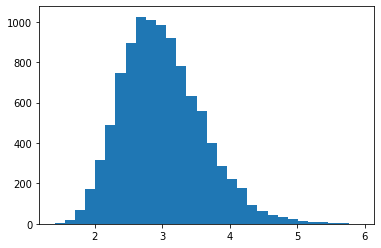

In [18]:
import matplotlib.pyplot as plt
plt.hist(sim.copy(), bins=30)
plt.show()

### b)

In [19]:
confidence = sim[:1000].std() / (1000**(1/2))

# googled the z value for 95% confidence - 1.96, thanks google very cool 
confidence *= 1.96 #-5 points: Google is not allowed as a resource. Additionally, the problem asked for a 90% interval, not 95%

In [20]:
print(sim.mean()+confidence)
print(sim.mean()-confidence)

3.04326666788844
2.9679454667553906


### c)

In [21]:
(sim > 3.).mean()

0.4623

i say no, because the simulated 12 year prices were below 3\\$ 46\% of the time - for buying at 3\\$ to be optimal, we would want this to be above 50%.